In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором средняя температура была минимальная и самый теплый год. 

In [4]:
df_by_year = pd.DataFrame()
df_by_year['day'] = df['Day']
df_by_year['year'] = df_by_year['day'].map(lambda x: x.year)
df_by_year['temp'] = df['t']
mean_temps = df_by_year.groupby(['year']).mean()
print('Coldest year: ', mean_temps.temp.idxmin(), '\nWarmest year: ', mean_temps.temp.idxmax())

Coldest year:  2012 
Warmest year:  2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [5]:
df_by_year[df_by_year.temp >= 0].groupby(['year']).count().temp.idxmax()

2015

**3.** В каком году было самое холодное лето (по средней температуре)

In [6]:
seasons = {0: 'winter', 1: 'spring', 2: 'summer', 3: 'autumn'}
df_by_year['season'] = df_by_year['day'].map(lambda x: seasons[(x.month // 3) % 4])
df_by_year[df_by_year.season == 'summer'].groupby(['year']).mean().temp.idxmin()

2008

**4.** Найдите день с самым большим перепадом температуры, если сравнивать со следующим днем. 

In [7]:
df_by_year['$\Delta$ temp'] = abs(df_by_year['temp'] - df_by_year['temp'].shift(-1))
df_by_year.loc[df_by_year['$\Delta$ temp'].idxmax()].day.ctime()

'Mon May 26 00:00:00 2014'

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

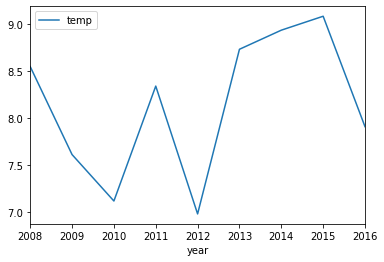

In [8]:
%matplotlib inline


mean_temps.plot()